In [1]:
%autosave 11

Autosaving every 11 seconds


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Define parameters and scores for plotting

version_numbers = [14, 10, 8, 7, 9, 6, 4, 5, 3, 2, 1]

Runtime = [839.3, 499.9, 1106.0, 1149.5, 646.2, 345.5, 22509.9, 19838.5, 14958.2, 14188.9, 80.0] # This is unused as it depends on the number of iterations run...

PRIVATE_scores = [0.798, 0.793, 0.796, 0.796, 0.793, 0.795, 0.790, 0.797, 0.791, 0.795, 0.793]
public_scores = [0.805, 0.799, 0.802, 0.794, 0.802, 0.802, 0.801, 0.799, 0.797, 0.791, 0.801]


versions = [
    {'metric': 'auc', 'is_unbalance': False, 'boosting': 'dart', 'num_leaves': 34, 'feature_fraction': 0.667927205852605, 'bagging_fraction': 0.5219719080737657, 'bagging_freq': 8, 'learning_rate': 0.07863555639586572, 'lambda': 1.2563918313970564e-08},
    {'metric': 'auc', 'is_unbalance': True, 'boosting': 'gbdt', 'num_leaves': 52, 'feature_fraction': 0.657892509849296, 'bagging_fraction': 0.4784039473533153, 'bagging_freq': 15, 'learning_rate': 0.020297749806988796, 'lambda': 2.564391157156461e-08},
    {'metric': 'binary_logloss', 'is_unbalance': True, 'boosting': 'gbdt', 'num_leaves': 74, 'feature_fraction': 0.6058659561901355, 'bagging_fraction': 0.637348465261602, 'bagging_freq': 14, 'learning_rate': 0.03141323923143285, 'lambda': 1.6279944760741493e-09},
    {'metric': 'auc', 'is_unbalance': False, 'boosting': 'gbdt', 'num_leaves': 52, 'feature_fraction': 0.6868232661586389, 'bagging_fraction': 0.691235779239058, 'bagging_freq': 29, 'learning_rate': 0.02877828483442414, 'lambda': 0.02113423144488708},
    {'metric': 'binary_logloss', 'is_unbalance': True, 'boosting': 'gbdt', 'num_leaves': 139, 'feature_fraction': 0.5172324812764049, 'bagging_fraction': 0.6312876011672777, 'bagging_freq': 14, 'learning_rate': 0.022898245610360038, 'lambda': 0.0006243903961130866},
    {'metric': 'binary_logloss', 'is_unbalance': False, 'boosting': 'dart', 'num_leaves': 30, 'feature_fraction': 0.6669262290888804, 'bagging_fraction': 0.6871179587254523, 'bagging_freq': 28, 'learning_rate': 0.04079570946519584, 'lambda': 4.247532187716679e-09},
    {'metric': 'binary_logloss', 'is_unbalance': False, 'boosting': 'dart', 'num_leaves': 60, 'feature_fraction': 0.6936212025178908, 'bagging_fraction': 0.693089247389914, 'bagging_freq': 19, 'learning_rate': 0.09515505175645035, 'lambda': 8.969462366441243e-05},
    {'metric': 'auc', 'is_unbalance': False, 'boosting': 'dart', 'num_leaves': 202, 'feature_fraction': 0.6928168048455284, 'bagging_fraction': 0.6932866202936437, 'bagging_freq': 20, 'learning_rate': 0.04388745737315872, 'lambda': 2.7280614007165827e-09},
    {'metric': 'auc',
     'is_unbalance': True,
     'boosting': 'dart',
     'num_leaves': 102,
     'feature_fraction': 0.5,
     'bagging_fraction': 0.5,
     'bagging_freq': 20, 'learning_rate': 0.09003480743336319, 'lambda': 1.733754098464166e-07},
    {'metric': 'auc',
     'is_unbalance': True,
     'boosting': 'gbdt',
     'num_leaves': 32,
     'feature_fraction': 0.5,
     'bagging_fraction': 0.5,
     'bagging_freq': 20, 'learning_rate': 0.03625875569816766, 'lambda': 0.00024626202290512893}
]
# Need to check the feature Set of the Versions once more

In [4]:
labels = list(versions[0].keys())

# Generate Final_Score by multiplying each element of the first array by 0.52 and each element of the second array by 0.48
final_Score = [round((x * 0.52) + (y * 0.48),3) for x, y in zip(public_scores, PRIVATE_scores)]
final_Score 

[0.802, 0.796, 0.799, 0.795, 0.798, 0.799, 0.796, 0.798, 0.794, 0.793, 0.797]

In [5]:
# Convert list of dictionaries to DataFrame
df = pd.DataFrame(versions)
#df = df[["depth_CATB","learning_rate_CATB","iterations_CATB","metric_LGBM","is_unbalance_LGBM"]]
df

,metric,is_unbalance,boosting,num_leaves,feature_fraction,bagging_fraction,bagging_freq,learning_rate,lambda
0,auc,False,dart,34,0.667927,0.521972,8,0.078636,1.256392e-08
1,auc,True,gbdt,52,0.657893,0.478404,15,0.020298,2.564391e-08
2,binary_logloss,True,gbdt,74,0.605866,0.637348,14,0.031413,1.627994e-09
3,auc,False,gbdt,52,0.686823,0.691236,29,0.028778,2.113423e-02
4,binary_logloss,True,gbdt,139,0.517232,0.631288,14,0.022898,6.243904e-04
5,binary_logloss,False,dart,30,0.666926,0.687118,28,0.040796,4.247532e-09
6,binary_logloss,False,dart,60,0.693621,0.693089,19,0.095155,8.969462e-05
7,auc,False,dart,202,0.692817,0.693287,20,0.043887,2.728061e-09
8,auc,True,dart,102,0.500000,0.500000,20,0.090035,1.733754e-07
9,auc,True,gbdt,32,0.500000,0.500000,20,0.036259,2.462620e-04


In [6]:
# Scaling or mapping functions
def scale_column(column):
    if column.dtype == 'bool':
        return column.astype(int), {True: 1, False: 0}
    elif column.dtype == 'object':
        categories = column.unique()
        mapping = {category: i / (len(categories)-1) for i, category in enumerate(categories)}
        return column.map(mapping), mapping
    else:
        return (column - column.min()) / (column.max() - column.min()), (column.min(), column.max())

# Apply scaling or mapping to each column and store scaling factors or mappings
column_mappings = {}
new_df = pd.DataFrame()
for col in df.columns:
    new_df[col], column_mappings[col] = scale_column(df[col])

print("Mapping or Scaling Factors:")
for col, mapping in column_mappings.items():
    print(f"{col}: {mapping}")

new_df

Mapping or Scaling Factors:
metric: {'auc': 0.0, 'binary_logloss': 1.0}
is_unbalance: {True: 1, False: 0}
boosting: {'dart': 0.0, 'gbdt': 1.0}
num_leaves: (30, 202)
feature_fraction: (0.5, 0.6936212025178908)
bagging_fraction: (0.4784039473533153, 0.6932866202936437)
bagging_freq: (8, 29)
learning_rate: (0.020297749806988796, 0.09515505175645035)
lambda: (1.6279944760741493e-09, 0.02113423144488708)


,metric,is_unbalance,boosting,num_leaves,feature_fraction,bagging_fraction,bagging_freq,learning_rate,lambda
0,0.0,0,0.0,0.023256,0.867298,0.202752,0.000000,0.779320,5.174508e-07
1,0.0,1,1.0,0.127907,0.815471,0.000000,0.333333,0.000000,1.136352e-06
2,1.0,1,1.0,0.255814,0.546768,0.739680,0.285714,0.148489,0.000000e+00
3,0.0,0,1.0,0.127907,0.964891,0.990456,1.000000,0.113289,1.000000e+00
4,1.0,1,1.0,0.633721,0.089001,0.711475,0.285714,0.034739,2.954396e-02
5,1.0,0,0.0,0.000000,0.862128,0.971293,0.952381,0.273827,1.239476e-07
6,1.0,0,0.0,0.174419,1.000000,0.999081,0.523810,1.000000,4.243968e-03
7,0.0,0,0.0,1.000000,0.995846,1.000000,0.571429,0.315129,5.205143e-08
8,0.0,1,0.0,0.418605,0.000000,0.100502,0.571429,0.931600,8.126505e-06
9,0.0,1,1.0,0.011628,0.000000,0.100502,0.571429,0.213219,1.165221e-02


In [7]:
# Round the values in new_df to 3 decimal places
new_df = new_df.round(3)

# Round the values in column_mappings to 3 decimal places if they are numeric
for col, mapping in column_mappings.items():
    if isinstance(mapping, dict):
        column_mappings[col] = {k: round(v, 3) for k, v in mapping.items()}
    elif isinstance(mapping, tuple):
        column_mappings[col] = tuple(round(val, 3) for val in mapping)

# Print the updated mappings
print("Mapping or Scaling Factors (After Rounding):")
for col, mapping in column_mappings.items():
    print(f"{col}: {mapping}")

new_df

Mapping or Scaling Factors (After Rounding):
metric: {'auc': 0.0, 'binary_logloss': 1.0}
is_unbalance: {True: 1, False: 0}
boosting: {'dart': 0.0, 'gbdt': 1.0}
num_leaves: (30, 202)
feature_fraction: (0.5, 0.694)
bagging_fraction: (0.478, 0.693)
bagging_freq: (8, 29)
learning_rate: (0.02, 0.095)
lambda: (0.0, 0.021)


,metric,is_unbalance,boosting,num_leaves,feature_fraction,bagging_fraction,bagging_freq,learning_rate,lambda
0,0.0,0,0.0,0.023,0.867,0.203,0.000,0.779,0.000
1,0.0,1,1.0,0.128,0.815,0.000,0.333,0.000,0.000
2,1.0,1,1.0,0.256,0.547,0.740,0.286,0.148,0.000
3,0.0,0,1.0,0.128,0.965,0.990,1.000,0.113,1.000
4,1.0,1,1.0,0.634,0.089,0.711,0.286,0.035,0.030
5,1.0,0,0.0,0.000,0.862,0.971,0.952,0.274,0.000
6,1.0,0,0.0,0.174,1.000,0.999,0.524,1.000,0.004
7,0.0,0,0.0,1.000,0.996,1.000,0.571,0.315,0.000
8,0.0,1,0.0,0.419,0.000,0.101,0.571,0.932,0.000
9,0.0,1,1.0,0.012,0.000,0.101,0.571,0.213,0.012


In [8]:
new_df["Score"] = pd.Series(final_Score)
new_df

,metric,is_unbalance,boosting,num_leaves,feature_fraction,bagging_fraction,bagging_freq,learning_rate,lambda,Score
0,0.0,0,0.0,0.023,0.867,0.203,0.000,0.779,0.000,0.802
1,0.0,1,1.0,0.128,0.815,0.000,0.333,0.000,0.000,0.796
2,1.0,1,1.0,0.256,0.547,0.740,0.286,0.148,0.000,0.799
3,0.0,0,1.0,0.128,0.965,0.990,1.000,0.113,1.000,0.795
4,1.0,1,1.0,0.634,0.089,0.711,0.286,0.035,0.030,0.798
5,1.0,0,0.0,0.000,0.862,0.971,0.952,0.274,0.000,0.799
6,1.0,0,0.0,0.174,1.000,0.999,0.524,1.000,0.004,0.796
7,0.0,0,0.0,1.000,0.996,1.000,0.571,0.315,0.000,0.798
8,0.0,1,0.0,0.419,0.000,0.101,0.571,0.932,0.000,0.794
9,0.0,1,1.0,0.012,0.000,0.101,0.571,0.213,0.012,0.793


In [9]:
# Sort the DataFrame by scores in ascending order
new_df_sorted = new_df.sort_values(by='Score', ascending=True)
new_df_sorted

,metric,is_unbalance,boosting,num_leaves,feature_fraction,bagging_fraction,bagging_freq,learning_rate,lambda,Score
9,0.0,1,1.0,0.012,0.000,0.101,0.571,0.213,0.012,0.793
8,0.0,1,0.0,0.419,0.000,0.101,0.571,0.932,0.000,0.794
3,0.0,0,1.0,0.128,0.965,0.990,1.000,0.113,1.000,0.795
1,0.0,1,1.0,0.128,0.815,0.000,0.333,0.000,0.000,0.796
6,1.0,0,0.0,0.174,1.000,0.999,0.524,1.000,0.004,0.796
4,1.0,1,1.0,0.634,0.089,0.711,0.286,0.035,0.030,0.798
7,0.0,0,0.0,1.000,0.996,1.000,0.571,0.315,0.000,0.798
2,1.0,1,1.0,0.256,0.547,0.740,0.286,0.148,0.000,0.799
5,1.0,0,0.0,0.000,0.862,0.971,0.952,0.274,0.000,0.799
0,0.0,0,0.0,0.023,0.867,0.203,0.000,0.779,0.000,0.802


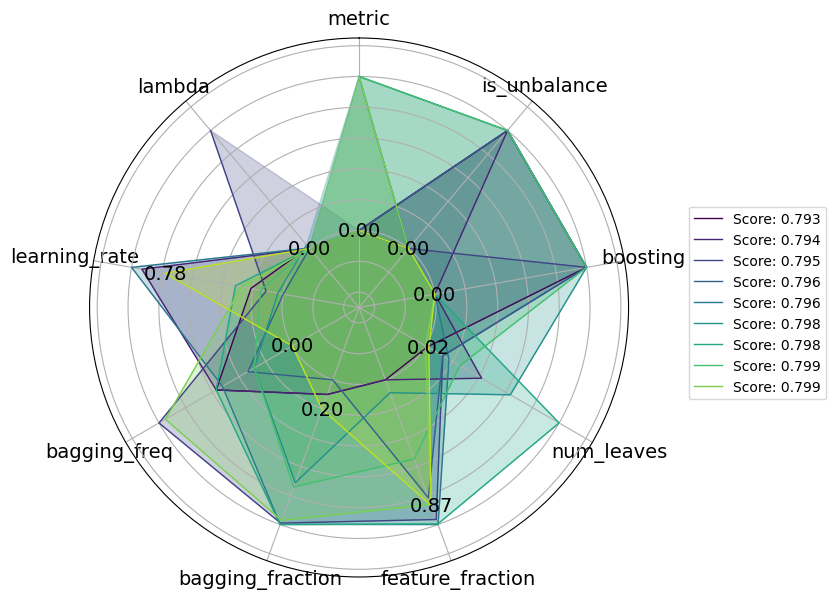

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data for plotting
labels = new_df.columns[:-1]  # Exclude the 'Score' column
best_score_row = new_df_sorted.iloc[-1]
best_score = best_score_row['Score']
versions = new_df_sorted.drop(columns='Score').to_dict(orient='records')
scores = new_df_sorted['Score']

# Plot radar graph
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(17, 7), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

legend_handles = []  # List to store legend handles
legend_labels = []   # List to store legend labels

for i, (version, score) in enumerate(zip(versions, scores)):
    values = [version[key] for key in labels]
    color = plt.cm.viridis(i / len(scores))  # Adjust the color based on the position
    
    if version == best_score_row.drop('Score').to_dict():
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=f"Score: {best_score}", color=color)
        ax.fill(angles, values, alpha=0.25, color=color)
        
        # Add radar values as text labels for the best radar graph
        for angle, value in zip(angles, values):
            ax.text(angle, value, f'{value:.2f}', color='black', fontsize=14, ha='center', va='center')
    else:
        line, = ax.plot(angles, values, linewidth=1, linestyle='solid', color=color)
        ax.fill(angles, values, alpha=0.25, color=color)
        legend_handles.append(line)
        legend_labels.append(f"Score: {score}")

ax.set_yticklabels([])

# Set custom positions for the x-axis tick marks
custom_positions = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
# custom_positions[10] -= 0.066  # Shift the tick mark positions
# custom_positions[11] += 0.066  # Shift the tick mark positions
ax.set_xticks(custom_positions)
ax.set_xticklabels(labels, fontsize=14)

# Set axis limits to slightly lower and higher values
ax.set_ylim(-0.5, 1.25)

# Add legend with all scores
ax.legend(legend_handles, legend_labels, loc='upper right', bbox_to_anchor=(1.38, 0.7))

plt.show()


# Chat GPT links:

1) https://chat.openai.com/share/c73821db-2d09-4851-9e95-65c09101fef2

2) https://chat.openai.com/share/f3520156-c785-4193-9e90-c27fadf80c57

3) https://chat.openai.com/share/6f137401-1edf-4774-8f49-d62df8591125